In [1]:
!pip install -Uqq fastai

In [3]:
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00


In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=1500):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Searching for 'posters of american movies 1900s-1950s'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


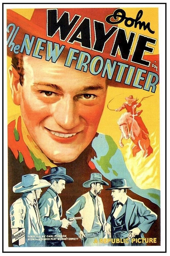

In [5]:
from fastdownload import download_url
dest = '00s-60s.jpg'
urls = search_images('posters of american movies 1900s-1960s', max_images=1)
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'posters of american movies 1960s-1990s'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


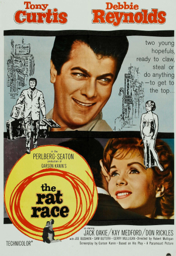

In [6]:
download_url(search_images('posters of american movies 1970s-1990s', max_images=1)[0], '70s-90s.jpg', show_progress=False)
Image.open('70s-90s.jpg').to_thumb(256,256)

In [25]:
searches = 'posters of american movies 1900s-1960s','posters of american movies 1970s-1990s', 'posters of american movies 2000s-2020s'
path = Path('movie_era')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'posters of american movies 1900s-1960s'
Searching for 'posters of american movies 1970s-1990s'
Searching for 'posters of american movies 2000s-2020s'


In [26]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

8

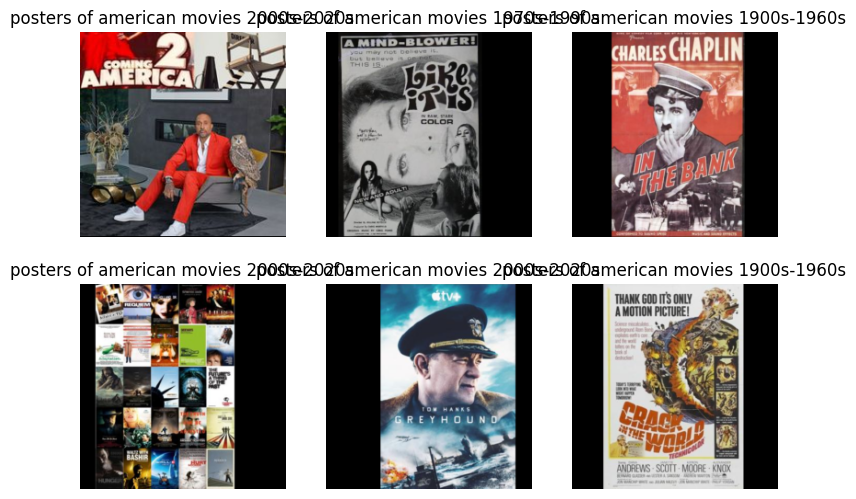

In [27]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=99),
    get_y=parent_label,
    item_tfms=[Resize(224, ResizeMethod.Pad, pad_mode='zeros')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [36]:
learn_movie_era = vision_learner(dls, resnet101, metrics=error_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:06<00:00, 27.8MB/s]


In [38]:
learn_movie_era.fine_tune(11)

epoch,train_loss,valid_loss,error_rate,time
0,0.008128,1.434405,0.372549,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.003400,1.580789,0.294118,00:04
1,0.008437,3.150612,0.431373,00:04
2,0.017004,3.298317,0.450980,00:04
3,0.034810,5.307692,0.509804,00:04
4,0.057533,2.872282,0.431373,00:04
5,0.101179,2.190128,0.352941,00:04
6,0.129522,1.647000,0.333333,00:04
7,0.115412,1.766157,0.411765,00:04
8,0.108291,1.575921,0.372549,00:04
9,0.116673,1.499584,0.352941,00:04


In [39]:
learn_movie_era.export('movie_era_model.pkl')